# Run the whole deltas algorithm

In [24]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [25]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


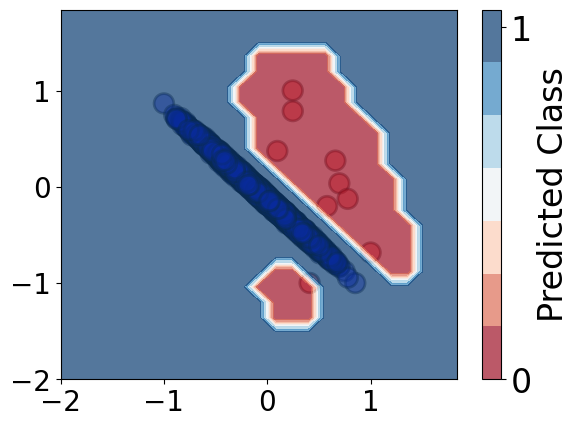

SMOTE


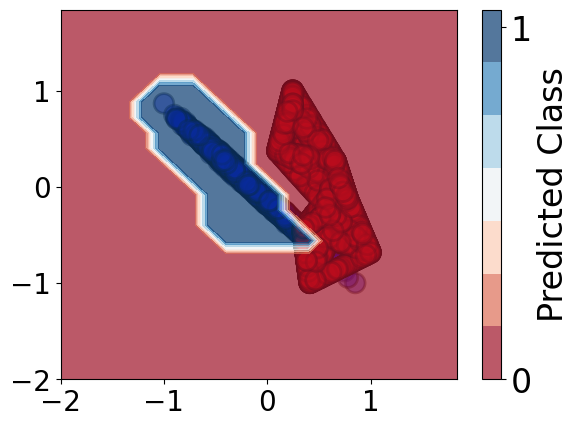

In [26]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'
data_clf['clf'], clf_SMOTE = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)

## Fit deltas

Original Data


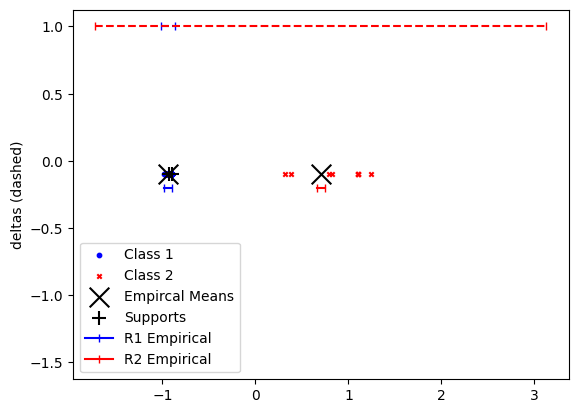

Trying random downsampling deltas (multiprocessing batches of 100):  18%|█▊        | 184/1000 [08:59<30:04,  2.21s/it] 

In [27]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(
    clf,
).fit(X, y, alpha=1000, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [ ]:
deltas_model.print_params()
deltas_model.print_deltas()

Parameters
                R:  1.4460694273366197
                N1: 9896
                N2: 5
                R1: 0.14824322070790613
                R2: 0.3068902337327053
                M:  1.4033200937556503
                D:  1.8584535481962616
                C1: 1
                C2: 1
"
                  delta1: 0.0001 
                  delta2: 0.9995929560106618
                  constraint: 2.4424906541753444e-15
                  


# Evaluation on test data

original accuracy: 0.71975
SMOTE accuracy: 0.93095
deltas accuracy: 0.8717

original F1: 0.6106286905175408
SMOTE F1: 0.9298379312096735
deltas F1: 0.8528163358953769

original precision0: 0.6408202499198975
SMOTE precision0: 0.9177086362314626
deltas precision0: 0.7957981855801369

original precision1: 1.0
SMOTE precision1: 0.945058349685015
deltas precision1: 1.0

original


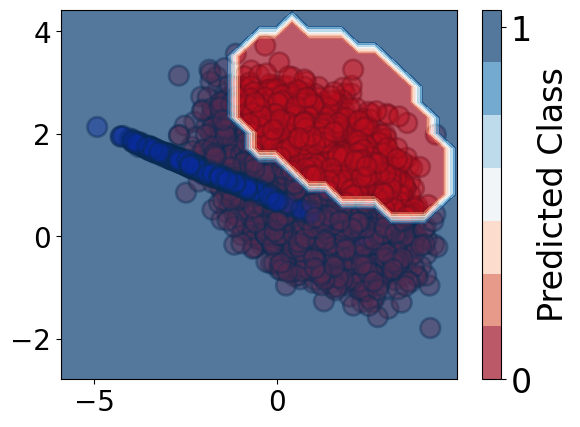

SMOTE


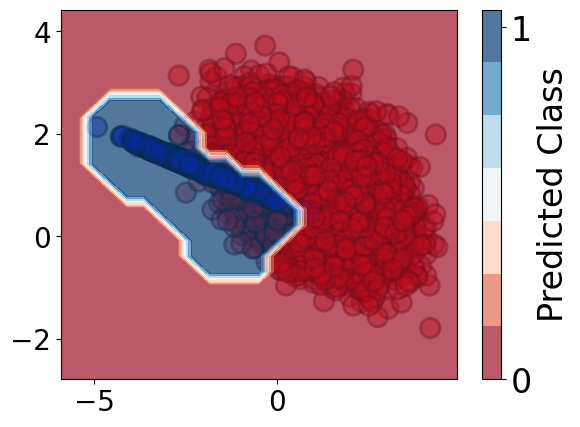

deltas


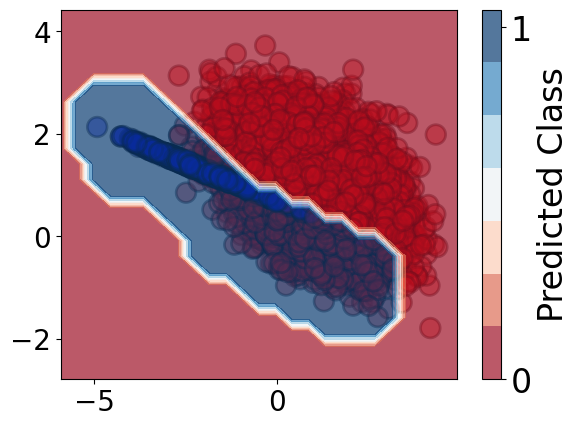

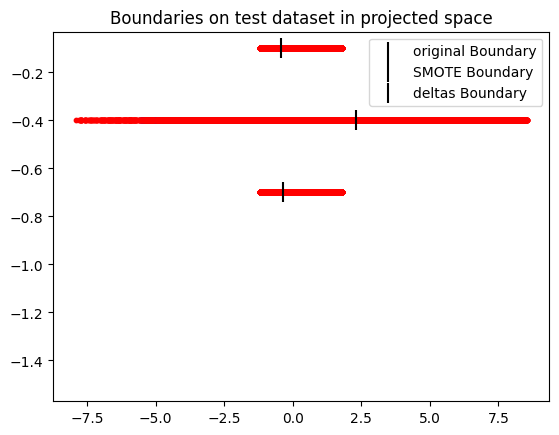

In [ ]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
evaluation.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)